Example file which shows some simple curve fitting using BMSRegressor and some other estimators.

In [1]:
# Import Packages
import warnings
import sys
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from functools import partial
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sys.path.append('../')
from aer_bms.skl.bms import BMSRegressor

In [2]:
def show_results_complete(
    data_: pd.DataFrame,
    estimator=None,
    show_results=True,
    projection="2d",
    label=None,
):
    """
    Function to plot input data (x_, y_) and the predictions of an estimator for the same x_.
    """
    if projection == "2d":
        plt.figure()
        data_.plot.scatter(
            "S1", "S2", c="difference_detected", cmap="viridis", zorder=10
        )
    elif projection == "3d":
        fig = plt.figure()
        ax = fig.add_subplot(projection="3d")
        ax.scatter(data_["S1"], data["S2"], data["difference_detected"])
        if estimator is not None:
            xs, ys = np.mgrid[0:5:0.2, 0:5:0.2]  # type: ignore
            zs = estimator.predict(np.column_stack((xs.ravel(), ys.ravel())))
            ax.plot_surface(xs, ys, zs.reshape(xs.shape), alpha=0.5)

    if label is not None:
        plt.title(label)

    if show_results:
        plt.show()

    return

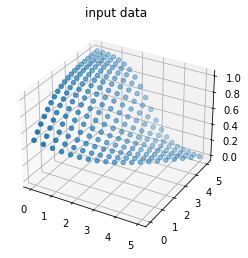

In [3]:
# load data
XLABS = [
    "S1",
    "S2",
]
data = pd.read_csv("../example/experiment_0_data.csv")
show_results = partial(show_results_complete, data_= data, projection="3d")
show_results(label="input data")

X, y = data[XLABS], data["difference_detected"]

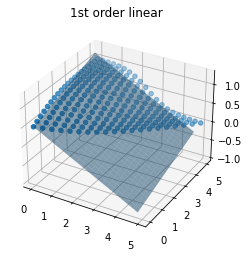

In [4]:
# %% Fit first using a super-simple linear regression

first_order_linear_estimator = LinearRegression()
first_order_linear_estimator.fit(X, y)

show_results(estimator=first_order_linear_estimator, label="1st order linear")

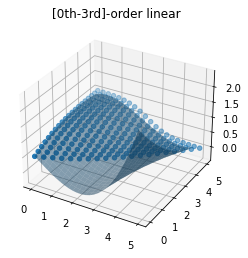

In [5]:
# %% Fit using a 0-3 order polynomial, getting the best fit for the data.
polynomial_estimator = GridSearchCV(
    make_pipeline(PolynomialFeatures(), LinearRegression(fit_intercept=False)),
    param_grid=dict(polynomialfeatures__degree=range(4)),
)
polynomial_estimator.fit(X, y)

show_results(estimator=polynomial_estimator, label="[0th-3rd]-order linear")

INFO:aer_bms.skl.bms:BMS fitting started
INFO:aer_bms.utils:Finish iteration 0
INFO:aer_bms.utils:Finish iteration 1
INFO:aer_bms.utils:Finish iteration 2
INFO:aer_bms.utils:Finish iteration 3
INFO:aer_bms.utils:Finish iteration 4
INFO:aer_bms.utils:Finish iteration 5
INFO:aer_bms.utils:Finish iteration 6
INFO:aer_bms.utils:Finish iteration 7
INFO:aer_bms.utils:Finish iteration 8
INFO:aer_bms.utils:Finish iteration 9
INFO:aer_bms.utils:Finish iteration 10
INFO:aer_bms.utils:Finish iteration 11
INFO:aer_bms.utils:Finish iteration 12
INFO:aer_bms.utils:Finish iteration 13
INFO:aer_bms.utils:Finish iteration 14
INFO:aer_bms.utils:Finish iteration 15
INFO:aer_bms.utils:Finish iteration 16
INFO:aer_bms.utils:Finish iteration 17
INFO:aer_bms.utils:Finish iteration 18
INFO:aer_bms.utils:Finish iteration 19
INFO:aer_bms.utils:Finish iteration 20
INFO:aer_bms.utils:Finish iteration 21
INFO:aer_bms.utils:Finish iteration 22
INFO:aer_bms.utils:Finish iteration 23
INFO:aer_bms.utils:Finish iterati

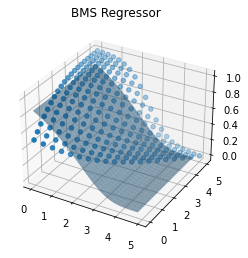

(_a0_ ** (cosh(S1) + S1))


array([[0.8558082],
       [0.8558082],
       [0.8558082],
       [0.8558082],
       [0.8558082]])

In [8]:
# initialize model
# hyper parameters

prior_par = {
    "Nopi_/": 5.912205942815285,
    "Nopi_cosh": 8.12720511103694,
    "Nopi_-": 3.350846072163632,
    "Nopi_sin": 5.965917796154835,
    "Nopi_tan": 8.127427922862411,
    "Nopi_tanh": 7.799259068142255,
    "Nopi_**": 6.4734429542245495,
    "Nopi_pow2": 3.3017352779079734,
    "Nopi_pow3": 5.9907496760026175,
    "Nopi_exp": 4.768665265735502,
    "Nopi_log": 4.745957377206544,
    "Nopi_sqrt": 4.760686909134266,
    "Nopi_cos": 5.452564657261127,
    "Nopi_sinh": 7.955723540761046,
    "Nopi_abs": 6.333544134938385,
    "Nopi_+": 5.808163661224514,
    "Nopi_*": 5.002213595420244,
    "Nopi_fac": 10.0,
    "Nopi2_*": 1.0,
}

# temperatures
ts = [1.0] + [1.04**k for k in range(1, 20)]

# epoch num
epochs = 100

# fit model
estimator = BMSRegressor(prior_par, ts, epochs)
estimator = estimator.fit(X, y)

# model estimate
show_results(
    estimator=estimator, label="BMS Regressor"
)
print(estimator.model_)

# model prediction
test_x = X.head()
estimator.predict(test_x)